In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.2 MB/s eta 0:00:00


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load dataset

In [3]:
df = pd.read_csv('instaFake.csv')

# Data inspection

In [4]:
# Display the first few rows and summary information
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   edge_followed_by  edge_follow  username_length  username_has_number  \
0             0.001        0.257               13                    1   
1             0.000        0.958                9                    1   
2             0.000        0.253               12                    0   
3             0.000        0.977               10                    1   
4             0.000        0.321               11                    0   

   full_name_has_number  full_name_length  is_private  is_joined_recently  \
0                     1                13           0                   0   
1                     0                 0           0                   1   
2                     0                 0           0                   0   
3                     0                 0           0                   0   
4                     0                11           1                   0   

   has_channel  is_business_account  has_guides  has_external_url  is_fake  
0            0 

# Visualization of input data

<Figure size 1200x800 with 0 Axes>

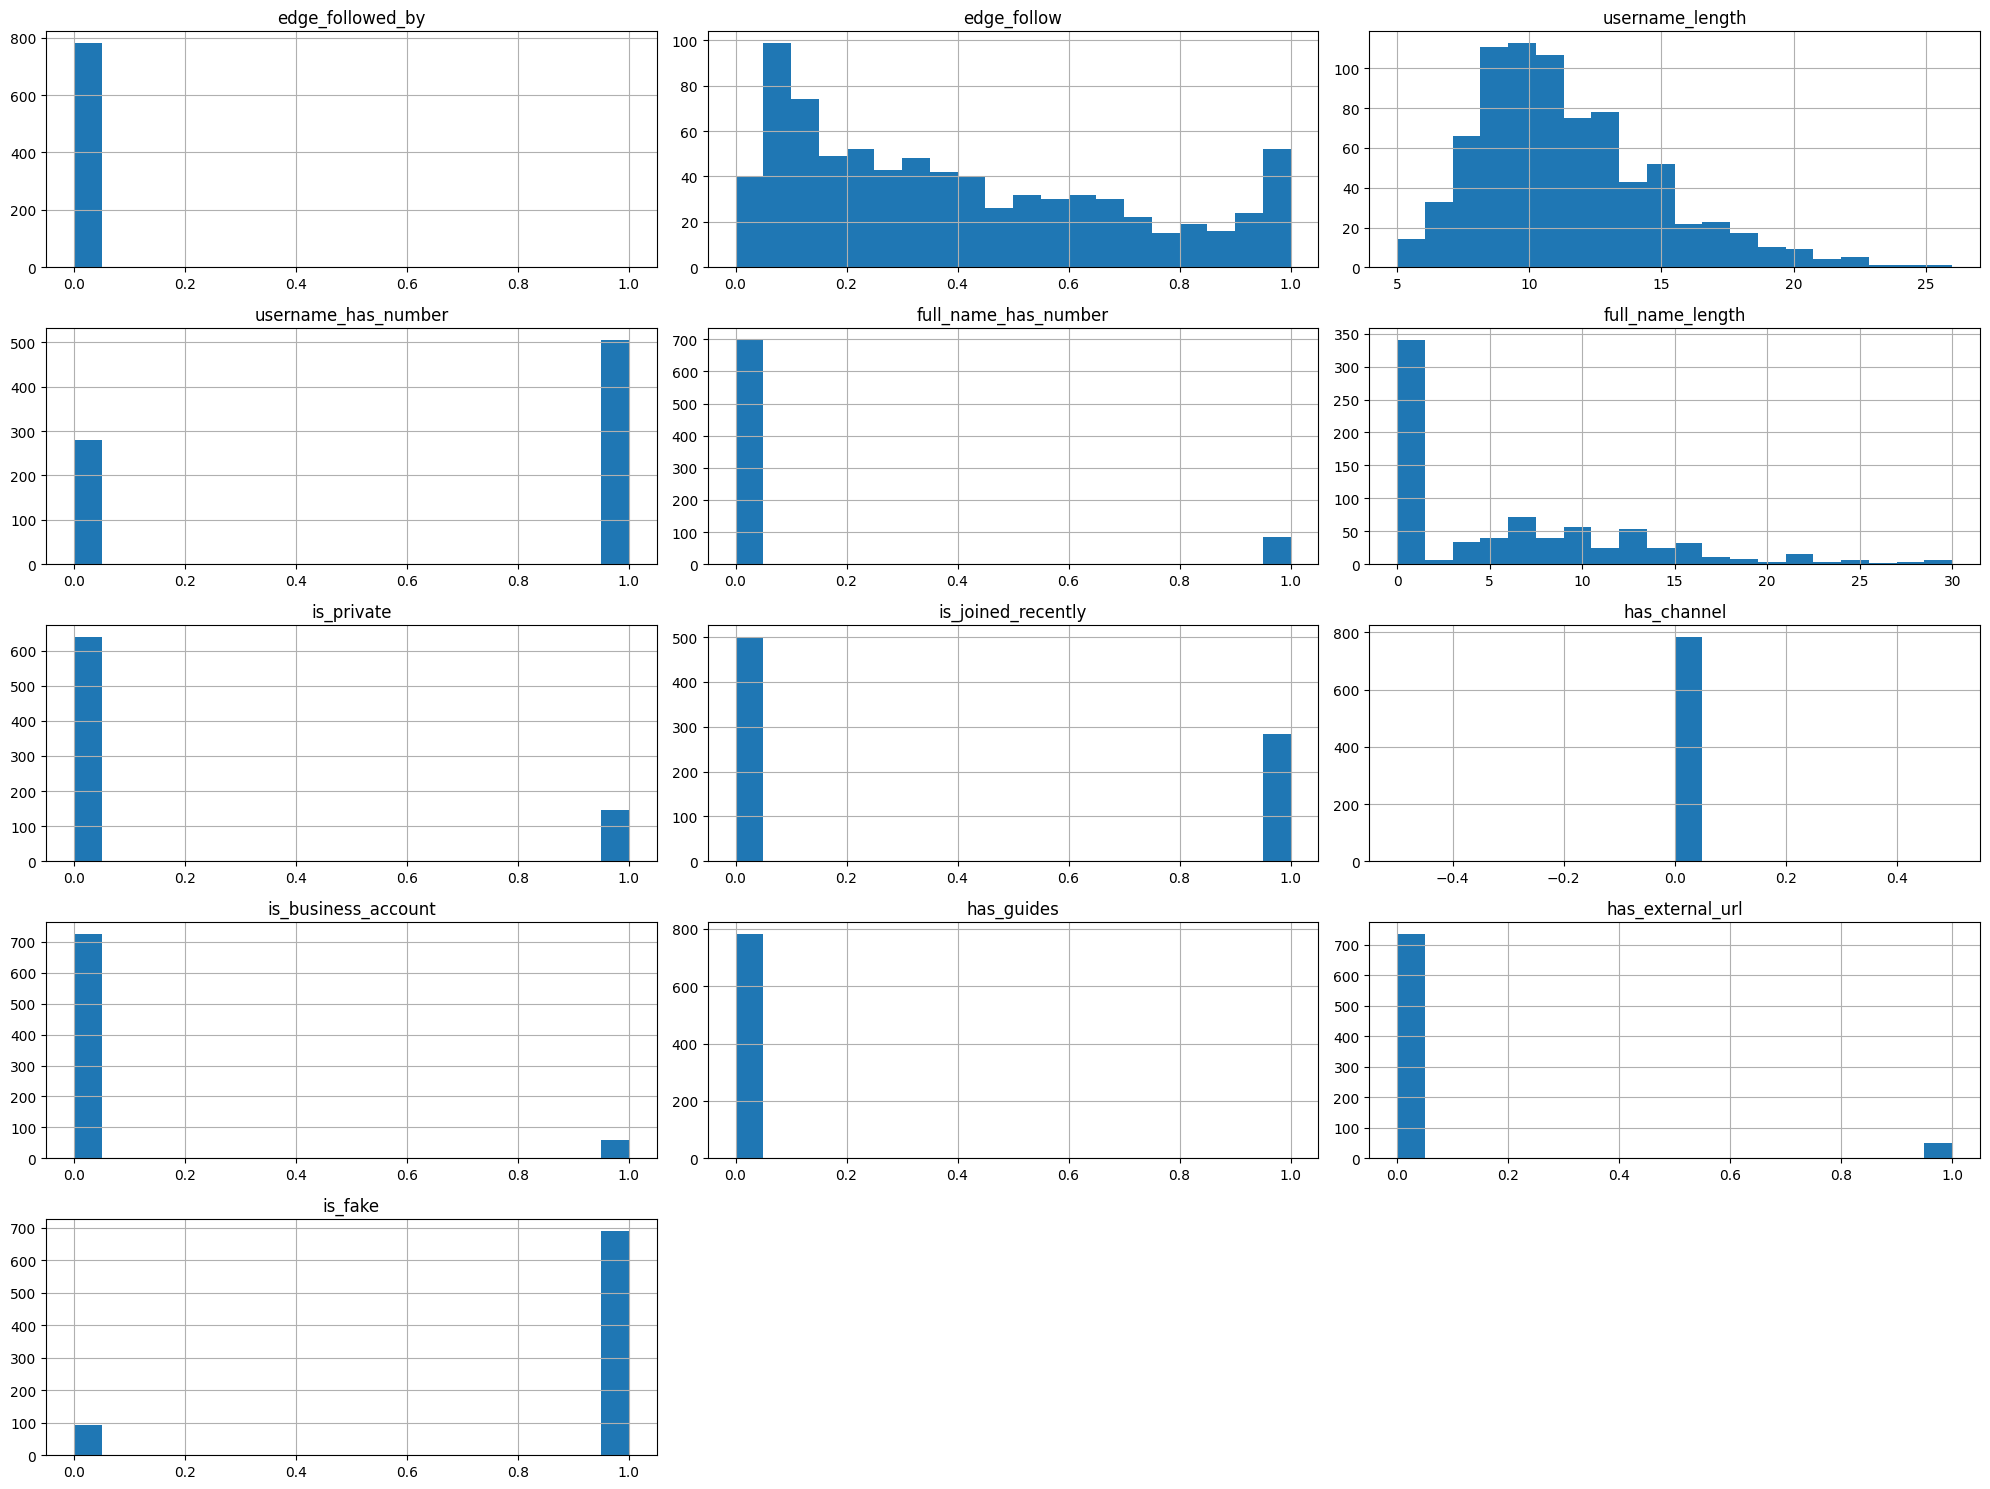

In [5]:
# Visualize distribution of features
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(20, 15), layout=(5, 3))
plt.tight_layout()
plt.show()

# Data correlations

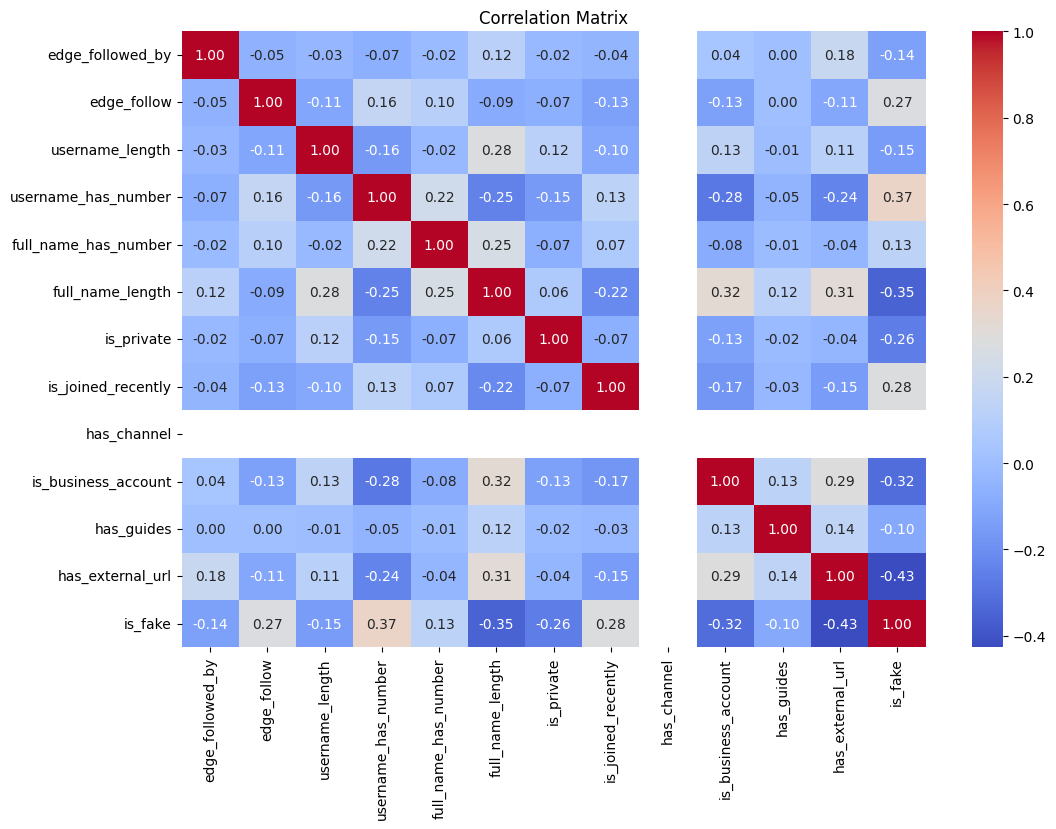

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Splitting data into train and test set

In [7]:
# Split data into features and target
X = df.drop('is_fake', axis=1)
y = df['is_fake']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model initialization

In [8]:
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(silent=True, random_state=42),
    'LGBM': LGBMClassifier(random_state=42, verbosity= -1)
}

# Train and evaluate models

In [9]:
best_model = None
best_accuracy = 0
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results.append((name, accuracy, classification_report(y_val, y_pred), confusion_matrix(y_val, y_pred)))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Evaluate model performance

Model: XGBoost
Accuracy: 0.9618
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       0.96      0.99      0.98       138

    accuracy                           0.96       157
   macro avg       0.95      0.86      0.90       157
weighted avg       0.96      0.96      0.96       157

Confusion Matrix:


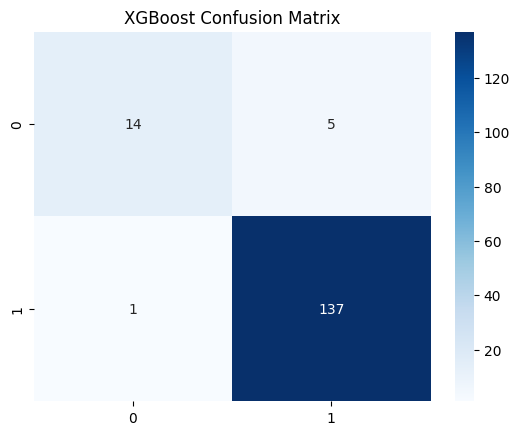



Model: AdaBoost
Accuracy: 0.9427
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.94      0.99      0.97       138

    accuracy                           0.94       157
   macro avg       0.93      0.79      0.84       157
weighted avg       0.94      0.94      0.94       157

Confusion Matrix:


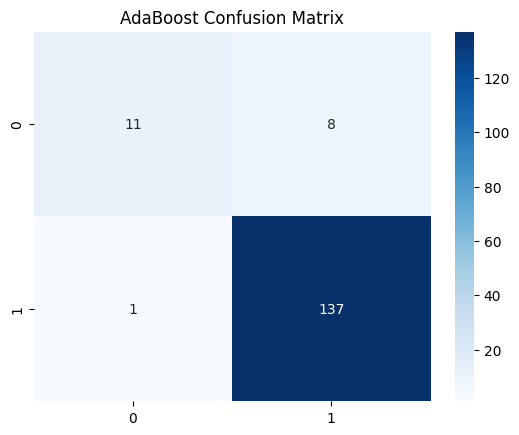



Model: CatBoost
Accuracy: 0.9490
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.95      0.99      0.97       138

    accuracy                           0.95       157
   macro avg       0.94      0.81      0.86       157
weighted avg       0.95      0.95      0.94       157

Confusion Matrix:


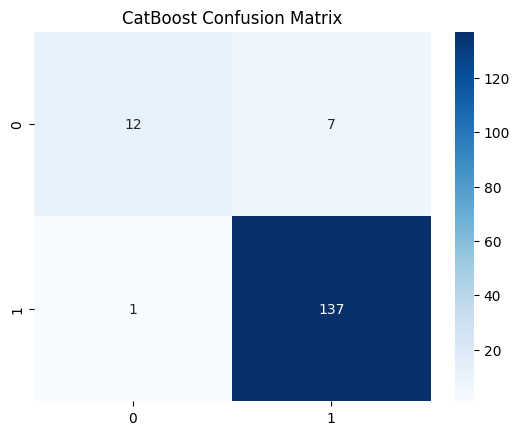



Model: LGBM
Accuracy: 0.9554
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.95      1.00      0.98       138

    accuracy                           0.96       157
   macro avg       0.98      0.82      0.87       157
weighted avg       0.96      0.96      0.95       157

Confusion Matrix:


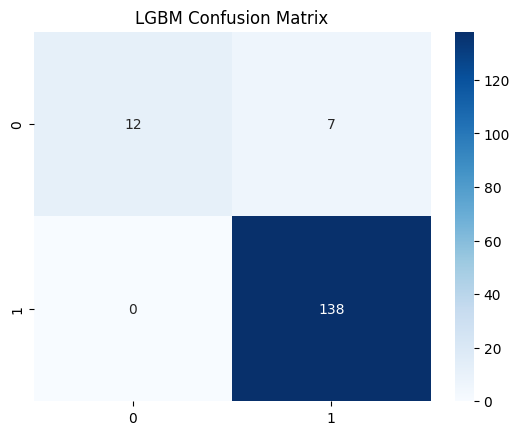

In [10]:
for result in results:
    name, accuracy, report, matrix = result
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    print("\n")

# Plot feature importance

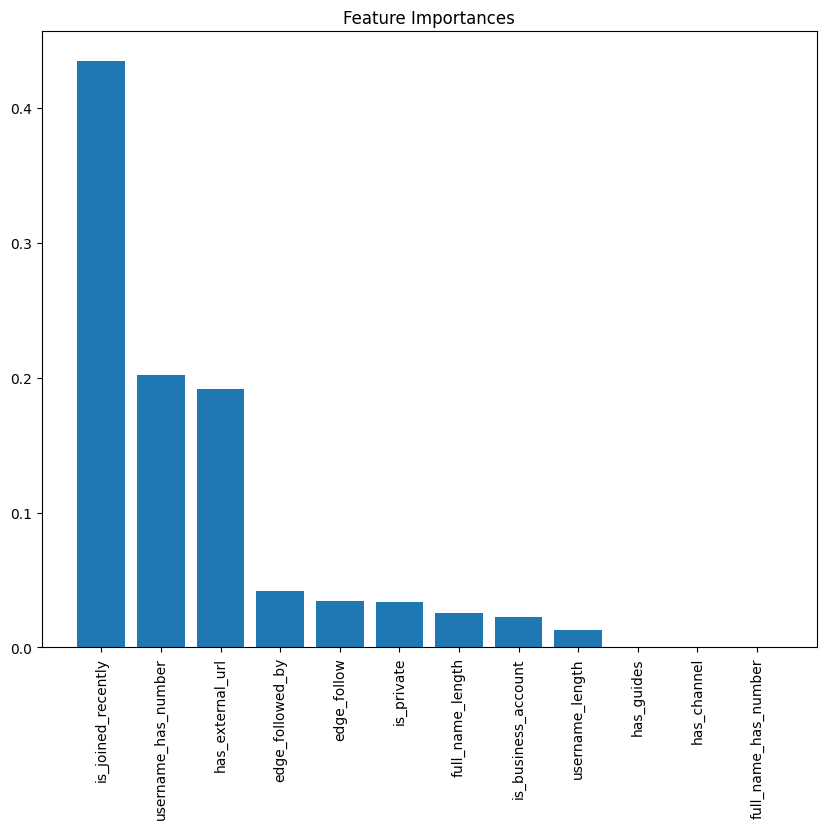

In [11]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 8))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Return the best model

In [12]:
print(f"Best Model: {best_model}")

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


# Plot of the best model

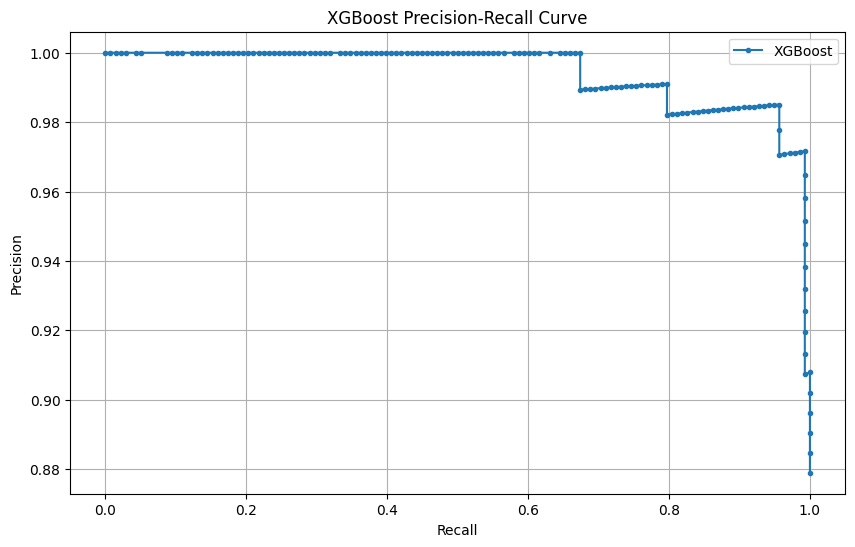

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities using the best model (XGBoost)
y_pred_proba = models['XGBoost'].predict_proba(X_val)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

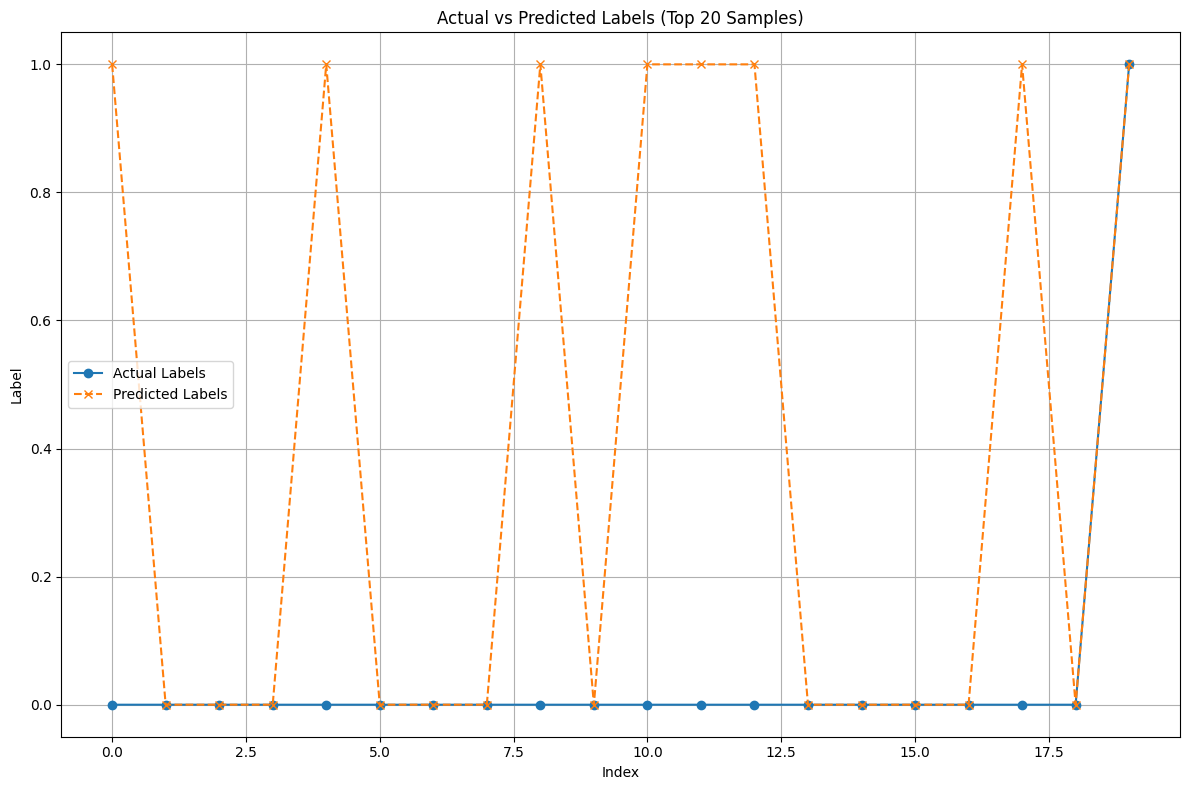

In [16]:
# Plotting top 20 predictions
sorted_indices = np.argsort(y_val)[:20]
plt.figure(figsize=(12, 8))
plt.plot(range(len(sorted_indices)), y_val.iloc[sorted_indices].values, label='Actual Labels', marker='o', linestyle='-')
plt.plot(range(len(sorted_indices)), [y_pred[i] for i in sorted_indices], label='Predicted Labels', marker='x', linestyle='--')
plt.title('Actual vs Predicted Labels (Top 20 Samples)')
plt.xlabel('Index')
plt.ylabel('Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()